## Importing libraries

In [1]:
import numpy as np
import itertools
import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
%config InlineBackend.figure_format = 'svg'

## Necessary functions

In [3]:
def findmax(L):
    ## finds maximum element of a 2-D list
    
    m=0
    for i in range(len(L)):
        for j in range(len(L[i])):
            if L[i][j]>m:
                m=L[i][j]
    return m


def findAdjacentElements(test_list,element):
    #find adjancet elements of an element in a list,
    #in case of terminal elemnts, returns None for either the left or right neighbour
    
    res = []
    for idx, ele in enumerate(test_list):
         if ele==element:
            # Checking for all cases to append
            if idx == 0:
                res.append((None, test_list[idx + 1]))
            elif idx == len(test_list) - 1:
                res.append((test_list[idx - 1], None))
            else:
                res.append((test_list[idx - 1], test_list[idx + 1]))
    return res

def plug_at_position(array,element,position):
    #given a list, and a position in list
    #plugs a new element right after that position
    ## plug_at_position([1,2,3,4],6,1)= [1, 2, 6, 3, 4]
    
    length_array=len(array)
    target_array=[]
    count=0
    
    while count<=position:
        target_array=[*target_array,array[count]]
        count=count+1
        
    target_array=[*target_array,element]
    while count<len(array):
        target_array=[*target_array,array[count]]
        count=count+1
        
    return target_array

## Creating the environment of the problem

In [ ]:
class Barnette_Graph(object):
    def __init__(self, face_vertex_dict):
        
        # states can be defined as path connected subsets of the set of faces such that,
            # 1. have no points in their interior
            # 2. the complement of the set of faces contained in a state is also path connected
        
        # face_vertex_dict is a dictionary whose keys are faces and values are 
        #the vertex indices of the corresponding key face
        # we input 
        
        self.face_vertex_dict=face_vertex_dict
        
    def string_to_list(self,string):
        l=string.split('.')
        return(l)
    
    def boundary_and_interior(self, state):
        state_list=self.string_to_list(state)
        vertices_in_state=[]
        for face in state_list:
            vertices_in_face=self.face_vertex_dict[face]
            for vertex in vertices_in_face:
                vertices_in_state.append(vertex)
        
        unique, counts = np.unique(np.array(vertices_in_state), return_counts=True)
        boundary_vertex_list=unique[counts<3]
        interior_vertex_list=unique[counts>=3]
        return boundary_vertex_list, interior_vertex_list
    
    def startState(self):
        maxface='1'
        for key in self.face_vertex_dict.keys():
            if len(self.face_vertex_dict[key])>
            len(self.face_vertex_dict[maxface]):
                maxface=key
        return maxface
    
    def isEnd(self, state):
        boundary_vertex_list, interior_vertex_list=
        self.boundary_and_interior(state)
        return len(boundary_vertex_list) == 
    findmax(list(self.face_vertex_dict.values()))
    
    def actions(self, state):
        #return a list of valid actions
        state_list=self.string_to_list(state)
        result=[]
        for key in self.face_vertex_dict.keys():
            state_vertices=[]
            for face in state_list:
                for vertex in self.face_vertex_dict[face]:
                    state_vertices.append(vertex)
            state_vertices=set(state_vertices)
            if key not in state_list:
                if len(set(self.face_vertex_dict[key]).intersection(state_vertices))==2:
                    check_interior=state+'.'+key
                    boundary_vertex_list, interior_vertex_list=
                    self.boundary_and_interior(check_interior)
                    if len(interior_vertex_list)==0:
                        result.append(key)
        return result
        
    def Successor_and_Cost(self, state):
        # create (new_state, cost) tuple
        
        allowed_actions=self.actions(state)
        
        succ_and_cost=[]
        for act in allowed_actions:
            newState=state+'.'+act
            boundary_vertex_list, interior_vertex_list=self.boundary_and_interior(newState)
            cost=-len(boundary_vertex_list)
            succ_and_cost.append((act,newState,cost))
            
        return (succ_and_cost)
    
    #def states(self):
    #    states=[]
    #    for i in range(1,int(len(list(face_vertex_dict.keys()))*1.5/3)+1):
    #        combinations = list(itertools.combinations(list(face_vertex_dict.keys()), i))
    #        for s in combinations:
    #            s=list(s)
    #            s=''.join(map(str, s))
    #            states.append(s)
    #    return states
    

## Algorithm for uniform cost search

In [5]:
def uniformcostsearch(problem, get_full_history=False):
    frontier={}
    explored={}
    frontier[problem.startState()]=-len(problem.face_vertex_dict[problem.startState()])
    
    while len(frontier)>0:
        
        state_with_minimum_pastcost=min(frontier, key=frontier.get)
        value=frontier[state_with_minimum_pastcost]
        explored[state_with_minimum_pastcost]=value
        del frontier[state_with_minimum_pastcost]
        
        if problem.isEnd(state_with_minimum_pastcost):
            if get_full_history==False:
                last_key = list(explored.keys()) [-1]
                return(last_key, explored[last_key])
            else:
                return(explored)
            
        for action, newState, cost in problem.Successor_and_Cost(state_with_minimum_pastcost):
            if newState in explored:
                continue
            else:
                frontier[newState]= cost +value

In [6]:
face_vertex_dict={'1':[1,2,4,3],'2':[5,6,2,1],'3':[2,6,8,4],'4':[3,4,8,7],'5':[5,1,3,7],'6':[5,6,8,7]}

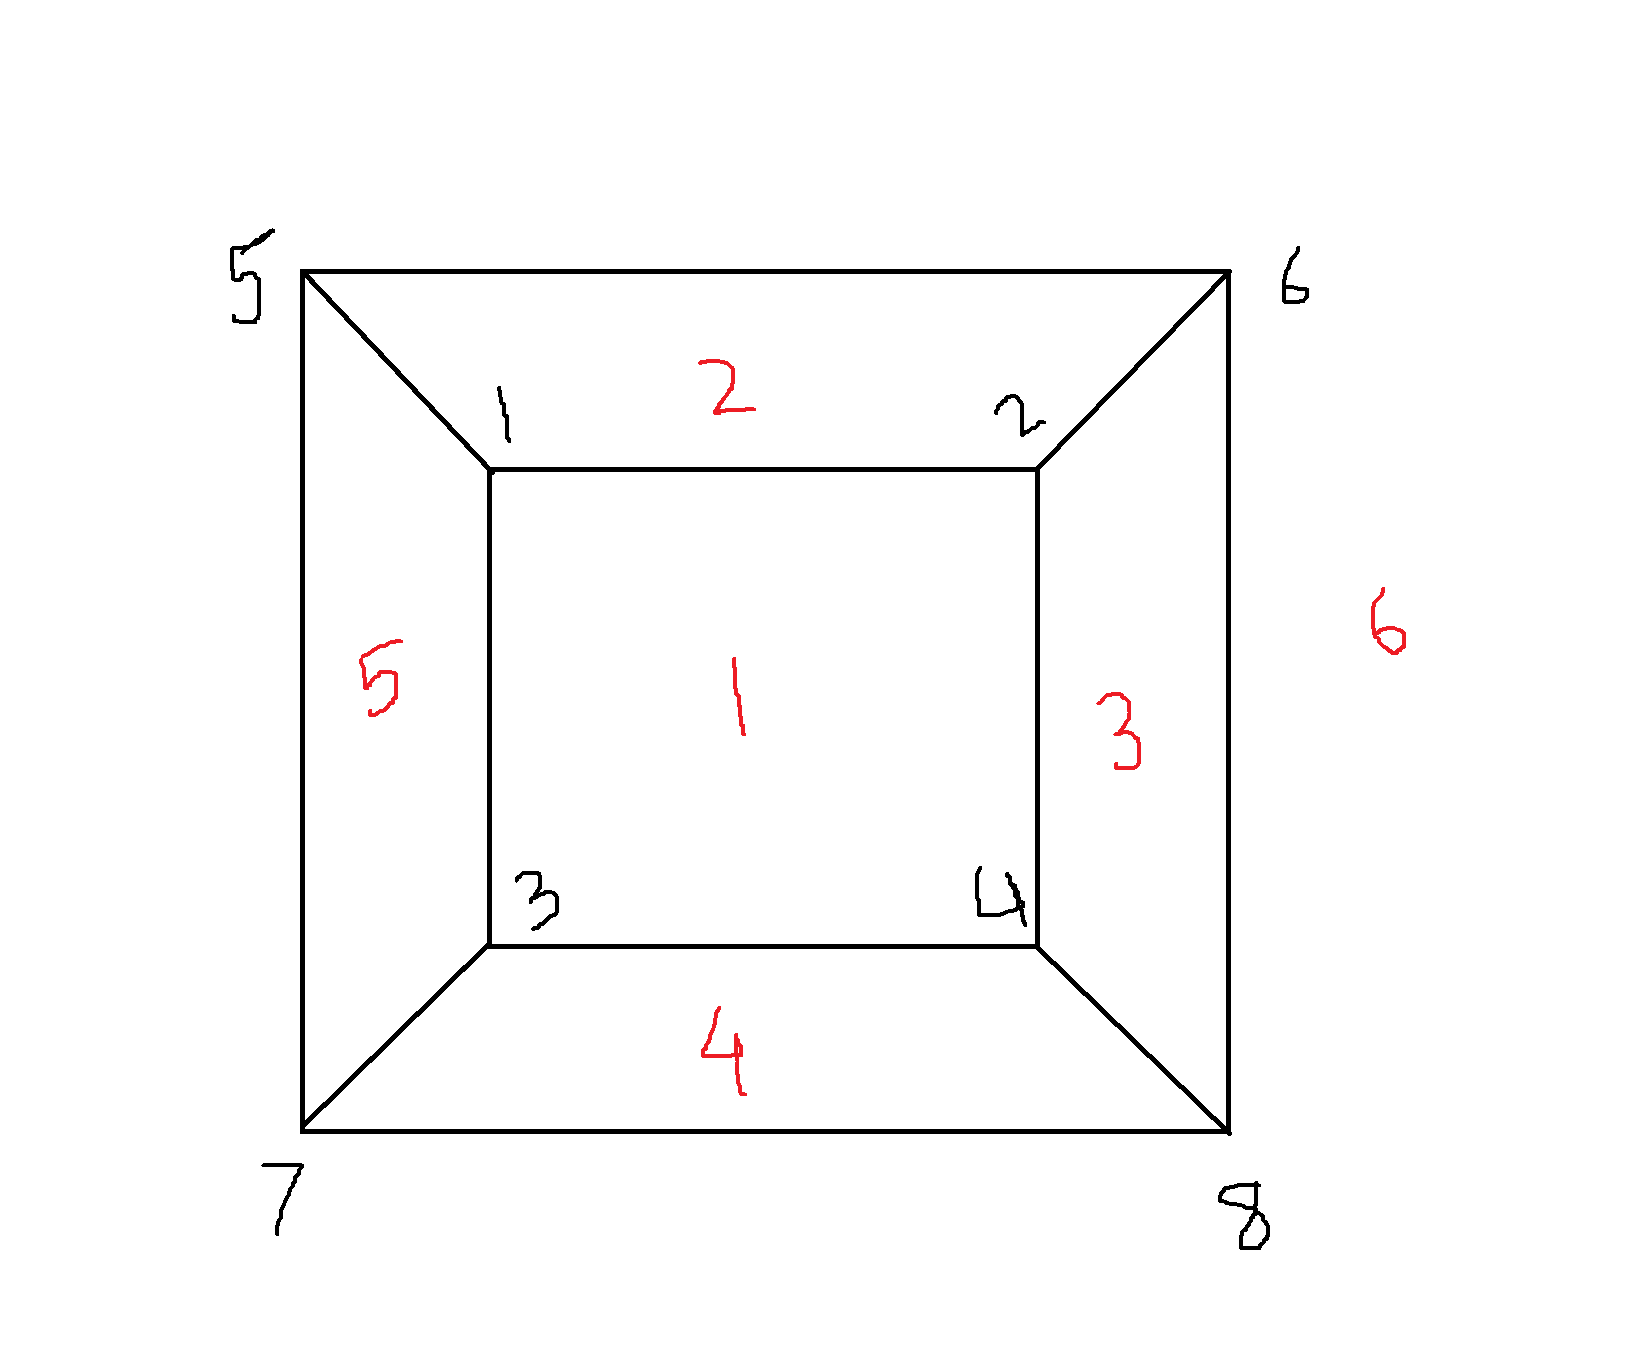

In [7]:
B0=Barnette_Graph(face_vertex_dict)

In [8]:
B0.face_vertex_dict

{'1': [1, 2, 4, 3],
 '2': [5, 6, 2, 1],
 '3': [2, 6, 8, 4],
 '4': [3, 4, 8, 7],
 '5': [5, 1, 3, 7],
 '6': [5, 6, 8, 7]}

In [9]:
B0.startState()

'1'

In [10]:
B0.boundary_and_interior('1.2.3')

(array([1, 3, 4, 5, 6, 8]), array([2]))

In [11]:
B0.isEnd('4.2.5.1')

False

In [12]:
B0.isEnd('2.6.1')

True

In [13]:
B0.actions('1.2')

['4', '6']

In [14]:
B0.Successor_and_Cost('1.2')

[('4', '1.2.4', -8), ('6', '1.2.6', -8)]

In [15]:
B0.Successor_and_Cost('1.4')

[('2', '1.4.2', -8), ('6', '1.4.6', -8)]

In [16]:
uniformcostsearch(B0)

('1.2.4', -18)

In [17]:
uniformcostsearch(B0,get_full_history=True)

{'1': -4, '1.2': -10, '1.2.4': -18}

## Doing an alpha operation on a Barnette graph

In [18]:
def alpha(face_vertex_dict, random_state=42):
    #print(face_vertex_dict)
    random.seed(random_state)
    np.random.seed(random_state)
    
    random_face=np.random.choice(list(face_vertex_dict.keys()))
    
    #print('Randomly chosen face for alpha operation:', random_face)
    
    odd_edges=[]
    even_edges=[]
    for i in range(len(face_vertex_dict[random_face])):
        if i%2==0:
            odd_edges.append((face_vertex_dict[random_face][i],
                              face_vertex_dict[random_face][(i+1)%len(face_vertex_dict[random_face])]))
        else:
            even_edges.append((face_vertex_dict[random_face][i],
                               face_vertex_dict[random_face][(i+1)%len(face_vertex_dict[random_face])]))
        
    toss=np.random.choice([1,0])
    if toss==1:
        selected_edges=[odd_edges[i] for i in (np.random.choice(len(odd_edges),2,replace=False))]
    else:
        selected_edges=[even_edges[i] for i in (np.random.choice(len(even_edges),2,replace=False))]
        
    #print('First selected edge for alpha operation:',selected_edges[0])
    #print('Second selected edge for alpha operation:',selected_edges[1])
    
    
    F=[]
    for key in face_vertex_dict.keys():
        random_face_vertices=face_vertex_dict[random_face]
        if key!=random_face:
            if len(set(face_vertex_dict[key]).intersection(random_face_vertices))==2:
                F.append(key)
                
    
    v_face_1_start_index=face_vertex_dict[random_face].index(selected_edges[0][1])
    v_face_1_end_index=face_vertex_dict[random_face].index(selected_edges[1][0])
    v_face_2_start_index=face_vertex_dict[random_face].index(selected_edges[1][1])
    v_face_2_end_index=face_vertex_dict[random_face].index(selected_edges[0][0])
    
    
    face_1=[]
    index=v_face_1_start_index
    while index%len(face_vertex_dict[random_face])!=v_face_1_end_index:
        mod_index=index%len(face_vertex_dict[random_face])
        face_1=[*face_1,face_vertex_dict[random_face][mod_index]]
        index=index+1
    
    face_1=[*face_1,face_vertex_dict[random_face][v_face_1_end_index]]
    
    face_2=[]
    index=v_face_2_start_index
    while index%len(face_vertex_dict[random_face])!=v_face_2_end_index:
        mod_index=index%len(face_vertex_dict[random_face])
        face_2=[*face_2,face_vertex_dict[random_face][mod_index]]
        index=index+1
    face_2=[*face_2,face_vertex_dict[random_face][v_face_2_end_index]]
    
    
    num_vertices=findmax(list(face_vertex_dict.values()))
    
    new_vertex_1=num_vertices+1
    new_vertex_2=num_vertices+2
    new_vertex_3=num_vertices+3
    new_vertex_4=num_vertices+4
    
    face_1_with_new_vertex=[new_vertex_2]
    for vertex in face_1:
        face_1_with_new_vertex=[*face_1_with_new_vertex,vertex]
    face_1_with_new_vertex=[*face_1_with_new_vertex,new_vertex_3]
    
    face_2_with_new_vertex=[new_vertex_4]
    for vertex in face_2:
        face_2_with_new_vertex=[*face_2_with_new_vertex,vertex]
    face_2_with_new_vertex=[*face_2_with_new_vertex,new_vertex_1]
        
    face_vertex_dict[random_face]=[new_vertex_1,new_vertex_2,new_vertex_3,new_vertex_4]
    
    face_index_1=str(max([eval(i) for i in list(face_vertex_dict.keys())])+1)
    face_index_2=str(max([eval(i) for i in list(face_vertex_dict.keys())])+2)
    
    face_vertex_dict[face_index_1]=face_1_with_new_vertex
    face_vertex_dict[face_index_2]=face_2_with_new_vertex
    
    
    neighbors_of_new_vertex_1_in_new_face_2=
    findAdjacentElements(face_2_with_new_vertex,new_vertex_1)[0]
    neighbors_of_new_vertex_2_in_new_face_1=
    findAdjacentElements(face_1_with_new_vertex,new_vertex_2)[0]
    neighbors_of_new_vertex_3_in_new_face_1=
    findAdjacentElements(face_1_with_new_vertex,new_vertex_3)[0]
    
    neighbors_of_new_vertex_4_in_new_face_2=findAdjacentElements(face_2_with_new_vertex,new_vertex_4)[0]
    
    
    
    other_affected_faces=[]
    
    
    for face in F:
        if len(set(face_vertex_dict[face]).intersection(set(selected_edges[0])))==2:
            other_affected_faces=(*other_affected_faces,face)
            
      
    for face in F:
        if len(set(face_vertex_dict[face]).intersection(set(selected_edges[1])))==2:
            other_affected_faces=(*other_affected_faces,face)
            
    
    
    neighbors_of_new_vertex_2_in_mod_face_1=
    list(set(neighbors_of_new_vertex_2_in_new_face_1).intersection(set(face_1_with_new_vertex)))
    neighbors_of_new_vertex_3_in_mod_face_1=
    list(set(neighbors_of_new_vertex_3_in_new_face_1).intersection(set(face_1_with_new_vertex)))
      
    neighbors_of_new_vertex_1_in_mod_face_2=
    list(set(neighbors_of_new_vertex_1_in_new_face_2).intersection(set(face_2_with_new_vertex)))
    neighbors_of_new_vertex_4_in_mod_face_2=
    list(set(neighbors_of_new_vertex_4_in_new_face_2).intersection(set(face_2_with_new_vertex)))
    
    
    
    
    neb_dict_mod_face={neighbors_of_new_vertex_1_in_mod_face_2[0]: new_vertex_1, neighbors_of_new_vertex_2_in_mod_face_1[0]: new_vertex_2, neighbors_of_new_vertex_3_in_mod_face_1[0]: new_vertex_3, neighbors_of_new_vertex_4_in_mod_face_2[0]: new_vertex_4}
     
    mod_faces=[]     
    for i in range(len(other_affected_faces)):
        index_1=face_vertex_dict[other_affected_faces[i]].index(selected_edges[i][0])
        index_2=face_vertex_dict[other_affected_faces[i]].index(selected_edges[i][1])
        
        index_1_neb=neb_dict_mod_face[face_vertex_dict[other_affected_faces[i]][index_1]]
        index_2_neb=neb_dict_mod_face[face_vertex_dict[other_affected_faces[i]][index_2]]
            
        if (index_1==index_2+1) or (index_2==index_1+1):
            if index_1>index_2:
                #order=(index_2_neb,index_1_neb)
                face_vertex_dict[other_affected_faces[i]]=
                plug_at_position(face_vertex_dict[other_affected_faces[i]],index_2_neb,index_2)
                face_vertex_dict[other_affected_faces[i]]=
                plug_at_position(face_vertex_dict[other_affected_faces[i]],index_1_neb,index_2+1)
            else:
                #order=(index_1_neb,index_2_neb)
                face_vertex_dict[other_affected_faces[i]]=
                plug_at_position(face_vertex_dict[other_affected_faces[i]],index_1_neb,index_1)
                face_vertex_dict[other_affected_faces[i]]=
                plug_at_position(face_vertex_dict[other_affected_faces[i]],index_2_neb,index_1+1)
        else: 
            k=len(face_vertex_dict[other_affected_faces[i]])-1
            if index_1==k:
                face_vertex_dict[other_affected_faces[i]]=
                [*face_vertex_dict[other_affected_faces[i]],index_1_neb,index_2_neb]
            else:
                face_vertex_dict[other_affected_faces[i]]=
                [*face_vertex_dict[other_affected_faces[i]],index_2_neb,index_1_neb]
    
    
  
    return face_vertex_dict
    

In [19]:
F={'1':[1,2,4,3],'2':[5,6,2,1],'3':[2,6,8,4],'4':[3,4,8,7],'5':[5,1,3,7],'6':[5,6,8,7]}

In [20]:
B1_graph=alpha(F)

In [21]:
B1=Barnette_Graph(B1_graph)

In [22]:
uniformcostsearch(B1)

('1.2.6', -26)

## Generate a random barnette graph with alpha operations

In [23]:
def generate_barnette_graph(alpha_iterations,random_state=42):
    B0_face_vertex_dict={'1':[1,2,4,3],'2':[5,6,2,1],'3':[2,6,8,4],
                         '4':[3,4,8,7],'5':[5,1,3,7],'6':[5,6,8,7]}
    Barnette_graph_face_vertex_dict=B0_face_vertex_dict
    for i in range(alpha_iterations):
        Barnette_graph_face_vertex_dict=alpha(Barnette_graph_face_vertex_dict, random_state)
    #print('Generated Graph with '+str(len(list(Barnette_graph_face_vertex_dict.keys())))+' faces')
    #print('Generated Graph with '+str(findmax(list(Barnette_graph_face_vertex_dict.values())))+' vertices')
    return Barnette_graph_face_vertex_dict

In [24]:
Barnette_graph_face_vertex_dict=generate_barnette_graph(500,random_state=79)

In [25]:
barnette_graph=Barnette_Graph(Barnette_graph_face_vertex_dict)

## Uniform Cost Search for a Hamiltonian Cycle and exploring the solution

In [26]:
history=uniformcostsearch(barnette_graph,get_full_history=True)

In [27]:
print('Total number of iterations to reach end state:', len(history.values()))

Total number of iterations to reach end state: 450


### Variation of the cost with iteration

Text(0, 0.5, 'Cost for iteration')

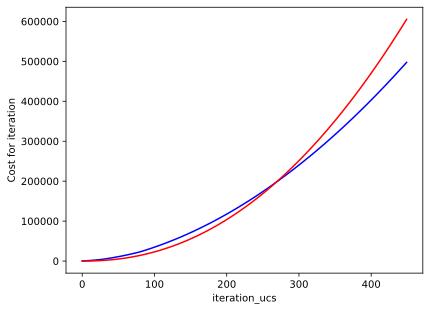

In [28]:
plt.plot(range(len(history.values())), np.abs(np.array(list(history.values()))), c ="blue")
plt.plot(range(len(history.values())), np.power(np.array(list(range(len(history.values())))),2.18), c ="red")
#plt.plot(range(len(boundary_of_pc_region)),4*np.array(range(len(boundary_of_pc_region))), c='red')
plt.xlabel("iteration_ucs")
plt.ylabel("Cost for iteration")

### Variation in the number of boundary vertices the with iteration

In [29]:
boundary_of_pc_region=[]
for i in range(len(history.values())-1):
    diff=list(history.values())[i]-list(history.values())[i+1]
    boundary_of_pc_region.append(diff)

Text(0, 0.5, 'Boundary of path conncected region')

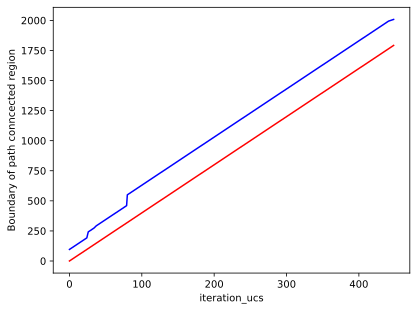

In [30]:
plt.plot(range(len(boundary_of_pc_region)), boundary_of_pc_region, c ="blue")
plt.plot(range(len(boundary_of_pc_region)),4*np.array(range(len(boundary_of_pc_region))), c='red')
plt.xlabel("iteration_ucs")
plt.ylabel("Boundary of path conncected region")

### Variation in face size included in the boundary with iteration

In [31]:
face_sizes_in_order_of_inclusion=[boundary_of_pc_region[0]]
for i in range(len(boundary_of_pc_region)-1):
    size=boundary_of_pc_region[i+1]-boundary_of_pc_region[i]
    face_sizes_in_order_of_inclusion.append(size+2)

Text(0, 0.5, 'Face size included in pc region for iteration')

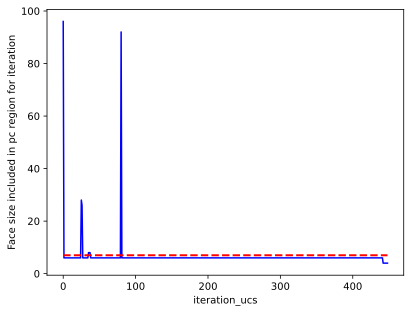

In [32]:
plt.plot(range(len(face_sizes_in_order_of_inclusion)), face_sizes_in_order_of_inclusion, c ="blue")
plt.plot(range(len(face_sizes_in_order_of_inclusion)), np.zeros(len(face_sizes_in_order_of_inclusion))+7, c ="red", linestyle='--', linewidth=2 )
plt.xlabel("iteration_ucs")
plt.ylabel("Face size included in pc region for iteration")

### Variation in branching factor with iteration

In [33]:
bf_at_iteration=[]
for i in range(len(list(history.keys()))):
    bf_at_iteration.append(len(barnette_graph.actions(list(history.keys())[i])))

Text(0, 0.5, 'Branching_factor')

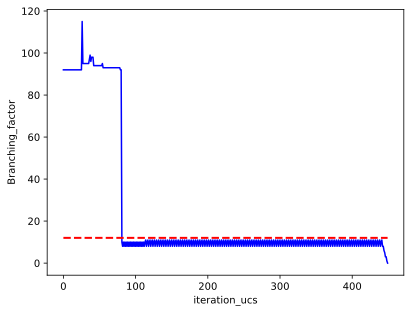

In [34]:
plt.plot(range(len(bf_at_iteration)), bf_at_iteration, c ="blue")
plt.plot(range(len(bf_at_iteration)), np.zeros(len(bf_at_iteration))+12, c ="red", linestyle='--', linewidth=2 )
plt.xlabel("iteration_ucs")
plt.ylabel("Branching_factor")

In [35]:
def multiplyList(myList):
    # Multiply elements one by one
    result = 1
    for x in myList:
        result = result * x
    return result

In [36]:
multiplyList(bf_at_iteration[:-1])

22933056231237915538923020275749264218054154038331124844808200735891788661042295093384508551344754092424737854510476412820022665272792582213170479739330537486510204776910563055318387454002584177032222362293186299877608419509324015037338168023211684333490941341557011008399066158177900107299026401776108402739768022579177662266916688040795386772847550924841294766064787746333917184000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

### Analytical estimations for branching factor

**Proposition**\
Let $P_i$ be a pc region obtained during the $i$-th step of the UCS and $\beta(P_i)$ be the branching factor of the search tree at the $i$-th step.
1) If the $i+1$-th step includes a $4$-face in the PC region then $\beta(P_{i+1})=\beta(P_i)-2$\
2) If the $i+1$-th step includes a $6$-face in the PC region then $\beta(P_{i+1})=\beta(P_i)$

**Proposition**


## Analyze degree distribution of faces

In [37]:
def face_degree_distribution(face_vertex_dict, return_counts=True):
    lengths_of_faces=[]
    for key in face_vertex_dict.keys():
        lengths_of_faces.append(len(face_vertex_dict[key]))
    lengths_of_faces=np.array(lengths_of_faces)
    if return_counts==True:
        unique, counts = np.unique(lengths_of_faces, return_counts=True)
        return lengths_of_faces, unique, counts
    else:
        return lengths_of_faces

In [38]:
random.seed(42)
FDD_list=[]
for i in range(1000):
    if i%100==0:
        print('We are at iteration '+ str(i))
    random_number_of_alpha_operations=np.random.randint(1,500)
    random_barnette_graph=generate_barnette_graph(random_number_of_alpha_operations,random_state=random_number_of_alpha_operations)
    random_barnette_graph_FDD=face_degree_distribution(random_barnette_graph, return_counts=False)
    for i in range(len(random_barnette_graph_FDD)):        
        FDD_list.append(random_barnette_graph_FDD[i])

We are at iteration 0
We are at iteration 100
We are at iteration 200
We are at iteration 300
We are at iteration 400
We are at iteration 500
We are at iteration 600
We are at iteration 700
We are at iteration 800
We are at iteration 900


In [39]:
FDD_list=np.array(FDD_list)

In [40]:
unique, counts = np.unique(FDD_list, return_counts=True)

Text(0, 0.5, 'counts')

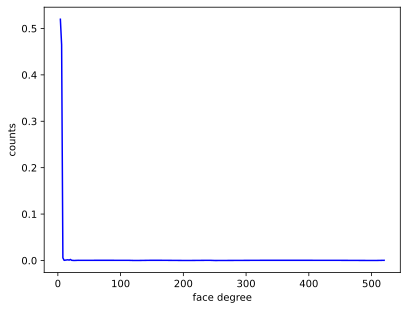

In [41]:
plt.plot(unique, counts/sum(counts), c ="blue")
plt.xlabel("face degree")
plt.ylabel("counts")

In [42]:
def power_law(x,a,b):
    return a*(1/np.power(x,b))

In [43]:
parameters, covariance = curve_fit(power_law, unique, counts/sum(counts))

In [44]:
print('learnt a=',parameters[0])
print('learnt b=',parameters[1])

learnt a= 10.270494174612168
learnt b= 2.088086890009374


Text(0, 0.5, '10.2*x^-2.08')

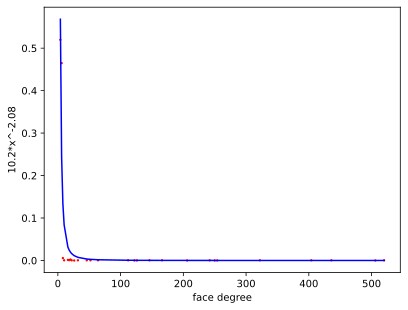

In [45]:
plt.scatter(unique, counts/sum(counts), c ="red", s=2)
plt.plot(unique, power_law(unique,parameters[0],parameters[1]), c ="blue")
plt.xlabel("face degree")
plt.ylabel(str(parameters[0])[:4]+"*x^-"+str(parameters[1])[:4])

## Expected face size of an $\alpha$-gen Barnette Graph

**Proposition** \
Let $G$ be a random $\alpha$-gen Barnette graph. The average face degree of $G$ must be less than $6$.\
**Proof**\
The averge degree is given by $\frac{S}{|F|}$, where $S=\sum_{i=1}{|F|}d(F_i)$, where $|F|$ is the cardinality of the set faces while $d(F_i)$ denotes the degree of the $i$-th face.\
Obviously, for $B_0$, the smallest Barnette graph, $\frac{S}{|F|}<6$. An easy check is that $B_1$, a random graph obtained by an arbitrary $\alpha$-operation on $B_0$. Let us assume that $\frac{S}{|F|}<6$ holds, for some $\alpha$-gen Barnette graph $B_l$ obtained by performing $l$ arbitrary $\alpha$-operations on $B_0$.\
Let $G=B_{l+1}$ be obtained be performing an arbitrary alpha operation on $B_0$. It is obvious that $S(B_{l+1})=S(B_l)+12$ and $|F(B_{l+1})|=|F(B_{l})|+2$. Let us assume that if possible, $\frac{S(B_{l+1})}{|F(B_{l+1})|}>6$. Then, $\frac{S(B_l)+12}{|F(B_{l})|+2}>6 \implies S(B_l)+12>6|F(B_{l})|+12 \implies S(B_l)>6|F(B_{l})|$, which is a contradiction as we assumed $\frac{S(B_l)}{|F(B_{l})|}<6$.


In [46]:
print('Expected face size is '+ str(np.sum(unique*(counts/sum(counts))))[:4])

Expected face size is 5.97
